## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Dataset

In [2]:
data = np.load('data.npy')
data

array([ 40.25196507,  39.53010126,  37.7992167 ,  37.32837052,
        28.65394346,  29.69747547,  26.10881978,  27.83802602,
        22.99054421,  25.80112967,  21.29795526,  19.91155621,
        14.96131425,  11.47430672,  16.95134087,  13.78849326,
         9.82605161,   6.51423783,   7.28107882,   4.71364215,
         0.82726539,   2.0547798 ,   1.75589251,   4.69110905,
        -3.1080814 ,   6.5508178 ,   9.30439077,  -5.9567694 ,
         2.87594962,   3.1993877 ,  -2.70786354,   2.15378132,
        -1.77644948,  -5.11557224,  -4.43062279,   6.25451526,
         1.9854139 ,   7.74342429,  -0.75124188,   4.43658355,
         2.96815869,   1.56463746,   0.77572103,   6.78279848,
        -0.71535178,   2.83930294,   0.35701732, -14.02823175,
         2.74610814,  -8.92342079,  -5.25805964,  -5.91984033,
       -11.23785323, -11.91938329,  -4.2483209 ,  -0.19964379,
        -9.63227683, -13.30314598, -13.12628213,  -7.21216734,
        -6.38891745,  -0.4667489 ,  -8.21628152,  -3.07

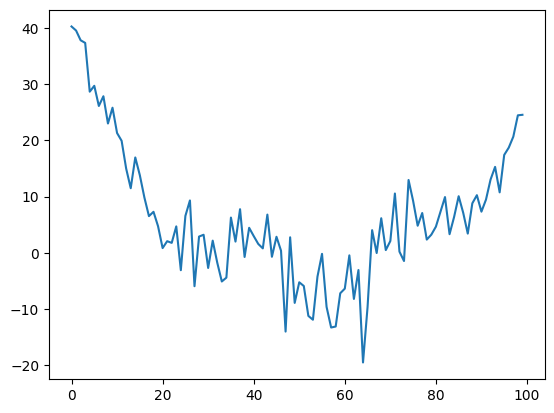

In [3]:
plt.plot(data)

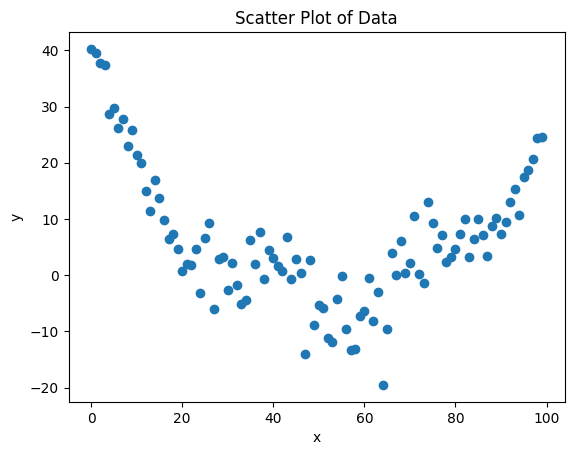

In [4]:
x = np.arange(len(data))

plt.scatter(x, data)
plt.title('Scatter Plot of Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Split dataset to train and test

In [5]:
X = np.linspace(0, 1, 100)
y = np.load('data.npy')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73, shuffle=True)

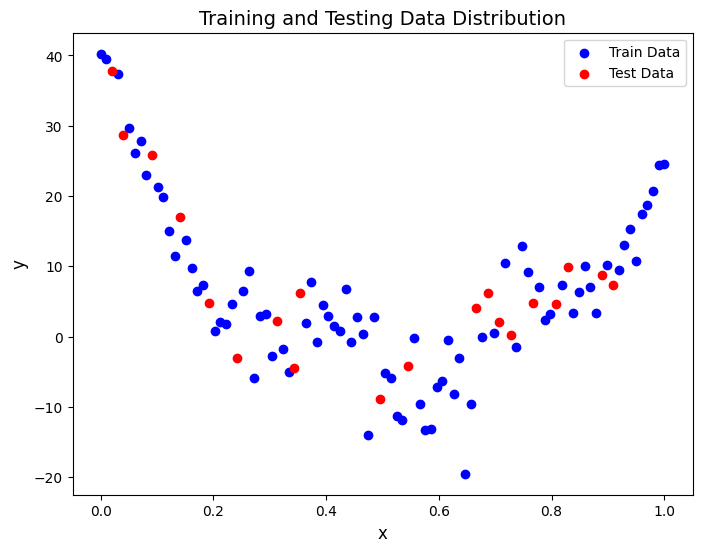

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')

plt.title('Training and Testing Data Distribution', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend()
plt.show()


#Model

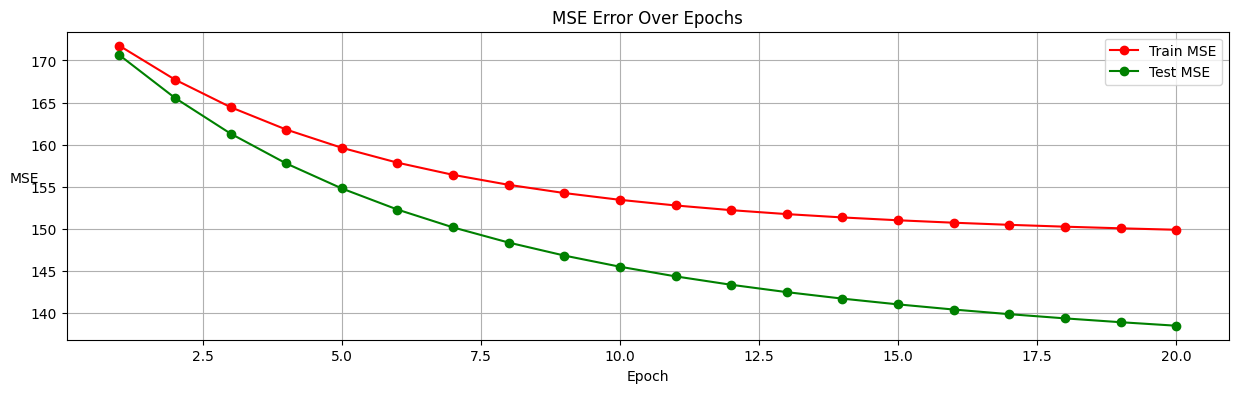

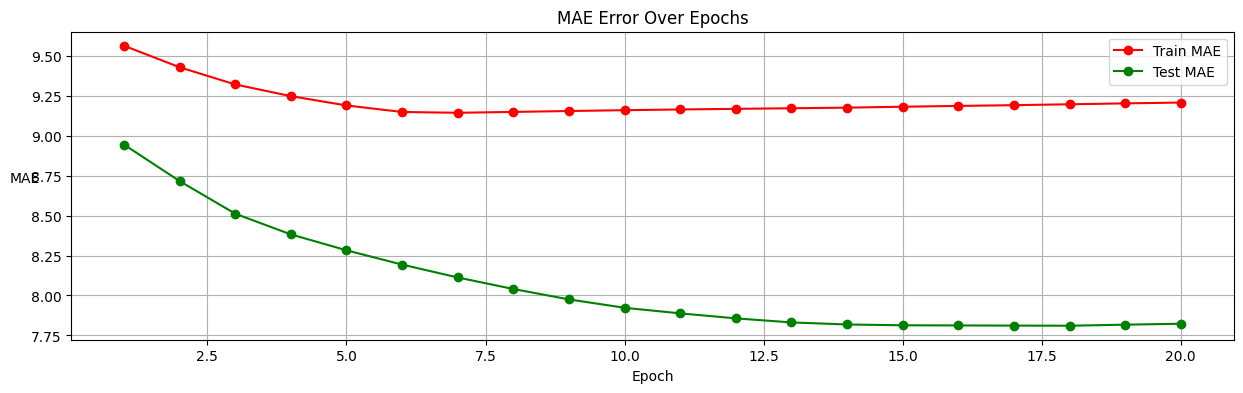

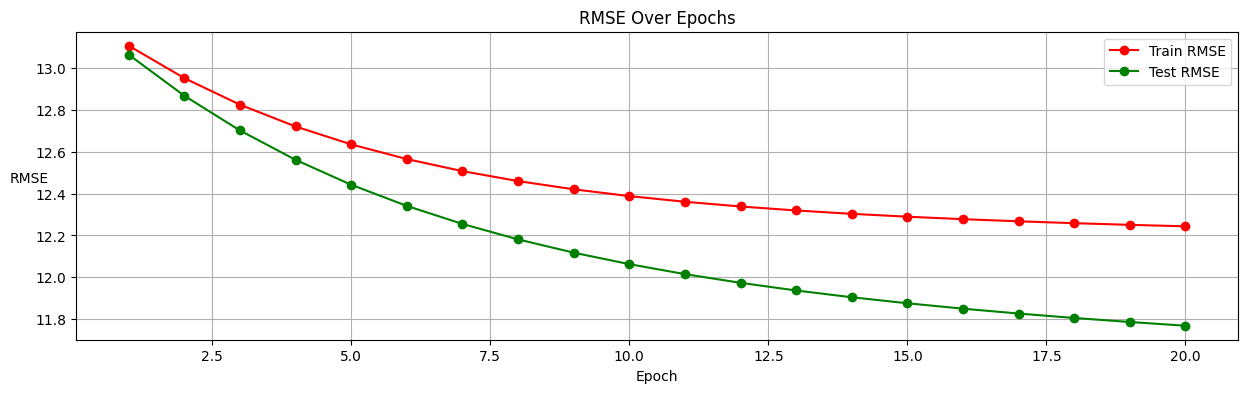

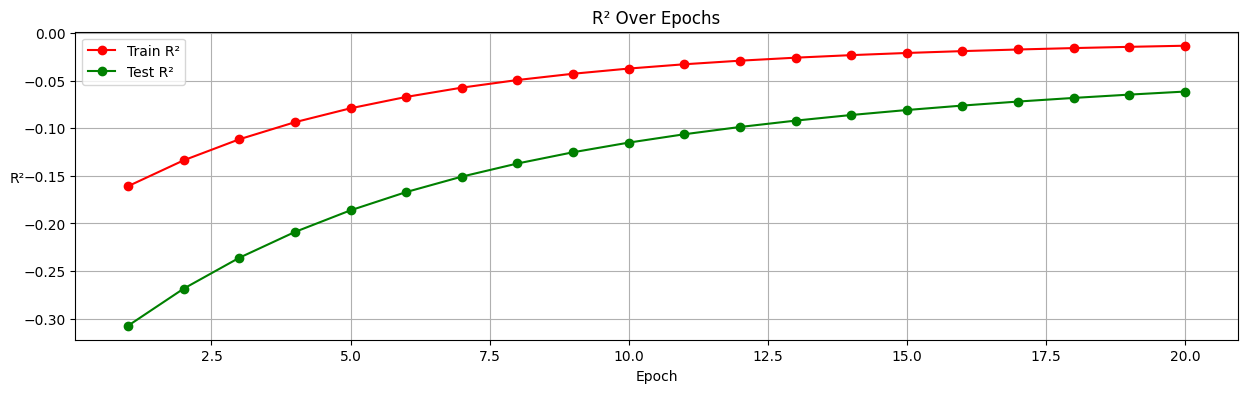

In [7]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Input parameters
LEARNING_RATE = 0.001
cost_list = []
cost_list_test = []
mae_list = []
mae_list_test = []
rmse_list = []
rmse_list_test = []
r2_list = []
r2_list_test = []
w_hist = []
b_hist = []

# Initialization
np.random.seed(69)
w = np.random.rand() * 2 - 0.5  # Scalar for single feature
b = np.random.rand() * 2 - 0.5  # Scalar bias

# Gradient descent loop
for i in range(20):
    w_hist.append(w)
    b_hist.append(b)

    y_hat = np.zeros((y_train.shape[0],))
    y_hat_test = np.zeros((y_test.shape[0],))

    # Forward pass for training data
    for d in range(y_hat.shape[0]):
        x = X_train[d]
        Z = w * x + b
        y_hat[d] = Z

    # Error metrics for training
    E = y_train - y_hat
    mse_train = np.mean(E ** 2)
    mae_train = np.mean(np.abs(E))
    rmse_train = np.sqrt(mse_train)
    ss_total_train = np.sum((y_train - np.mean(y_train)) ** 2)
    r2_train = 1 - (np.sum(E ** 2) / ss_total_train)

    cost_list.append(mse_train)
    mae_list.append(mae_train)
    rmse_list.append(rmse_train)
    r2_list.append(r2_train)

    # Forward pass for testing data
    for d in range(y_hat_test.shape[0]):
        x = X_test[d]
        Z = w * x + b
        y_hat_test[d] = Z

    # Error metrics for testing
    E_test = y_test - y_hat_test
    mse_test = np.mean(E_test ** 2)
    mae_test = np.mean(np.abs(E_test))
    rmse_test = np.sqrt(mse_test)
    ss_total_test = np.sum((y_test - np.mean(y_test)) ** 2)
    r2_test = 1 - (np.sum(E_test ** 2) / ss_total_test)

    cost_list_test.append(mse_test)
    mae_list_test.append(mae_test)
    rmse_list_test.append(rmse_test)
    r2_list_test.append(r2_test)

    # Update rule
    dj = np.sum(E * X_train)
    w = w + LEARNING_RATE * dj
    b = b + LEARNING_RATE * np.sum(E)

# Visualization: Training and Testing MSE
plt.figure(figsize=(15, 4))
plt.plot(list(range(1, len(cost_list) + 1)), cost_list,
         marker='o', markerfacecolor='red', color='red', label='Train MSE')
plt.plot(list(range(1, len(cost_list_test) + 1)), cost_list_test,
         marker='o', markerfacecolor='green', color='green', label='Test MSE')
plt.title('MSE Error Over Epochs')
plt.ylabel('MSE', rotation=0)
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

# Visualization: Training and Testing MAE
plt.figure(figsize=(15, 4))
plt.plot(list(range(1, len(mae_list) + 1)), mae_list,
         marker='o', markerfacecolor='red', color='red', label='Train MAE')
plt.plot(list(range(1, len(mae_list_test) + 1)), mae_list_test,
         marker='o', markerfacecolor='green', color='green', label='Test MAE')
plt.title('MAE Error Over Epochs')
plt.ylabel('MAE', rotation=0)
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

# Visualization: Training and Testing RMSE
plt.figure(figsize=(15, 4))
plt.plot(list(range(1, len(rmse_list) + 1)), rmse_list,
         marker='o', markerfacecolor='red', color='red', label='Train RMSE')
plt.plot(list(range(1, len(rmse_list_test) + 1)), rmse_list_test,
         marker='o', markerfacecolor='green', color='green', label='Test RMSE')
plt.title('RMSE Over Epochs')
plt.ylabel('RMSE', rotation=0)
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

# Visualization: Training and Testing R2
plt.figure(figsize=(15, 4))
plt.plot(list(range(1, len(r2_list) + 1)), r2_list,
         marker='o', markerfacecolor='red', color='red', label='Train R²')
plt.plot(list(range(1, len(r2_list_test) + 1)), r2_list_test,
         marker='o', markerfacecolor='green', color='green', label='Test R²')
plt.title('R² Over Epochs')
plt.ylabel('R²', rotation=0)
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

# Convert history lists to arrays if needed
b_hist = np.array(b_hist)
w_hist = np.array(w_hist)
cost_arr = np.array(cost_list)


In [8]:
# Final weights and bias (slope and intercept)
final_slope = w  # This is the learned weight
final_intercept = b  # This is the learned bias

# Final errors
final_train_mse = cost_list[-1]
final_test_mse = cost_list_test[-1]
final_train_rmse = cost_list[-1]
final_test_rmse = cost_list_test[-1]
final_train_mae = mae_list[-1]
final_test_mae = mae_list_test[-1]
final_train_r2 = r2_list[-1]
final_test_r2 = r2_list_test[-1]


# Print the results
print(f"Final Slope (w): {final_slope}")
print(f"Final Intercept (b): {final_intercept}")
print("\nFinal Errors:")
print(f"Train MSE: {final_train_mse}")
print(f"Test MSE: {final_test_mse}")
print(f"Train RMSE: {final_train_rmse}")
print(f"Test RMSE: {final_test_rmse}")
print(f"Train MAE: {final_train_mae}")
print(f"Test MAE: {final_test_mae}")
print("\nFinal R² Scores:")
print(f"Train R²: {final_train_r2}")
print(f"Test R²: {final_test_r2}")


Final Slope (w): 0.6523521081462805
Final Intercept (b): 4.823074903191027

Final Errors:
Train MSE: 149.9029811616927
Test MSE: 138.51410104497046
Train RMSE: 149.9029811616927
Test RMSE: 138.51410104497046
Train MAE: 9.206567509482719
Test MAE: 7.82321532026446

Final R² Scores:
Train R²: -0.013226227874048035
Test R²: -0.06142059017691137


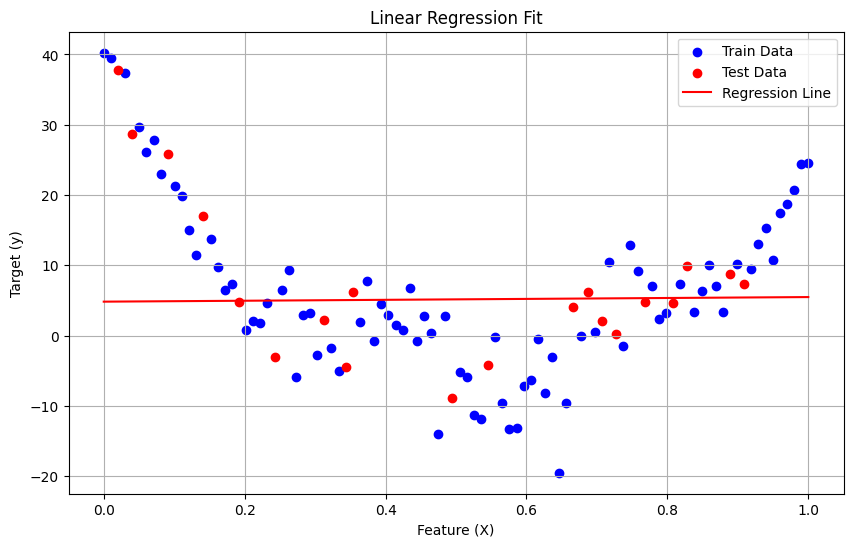

In [9]:
line_x = np.linspace(0, 1, 100)
line_y = final_slope * line_x + final_intercept

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(line_x, line_y, color='red', label='Regression Line')
plt.title('Linear Regression Fit')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-10-f5597ca45023>:28: RuntimeWarning: divide by zero encountered in scalar divide
  r2_train = 1 - np.sum((y_train_subset - y_hat_train_full) ** 2) / ss_total_train


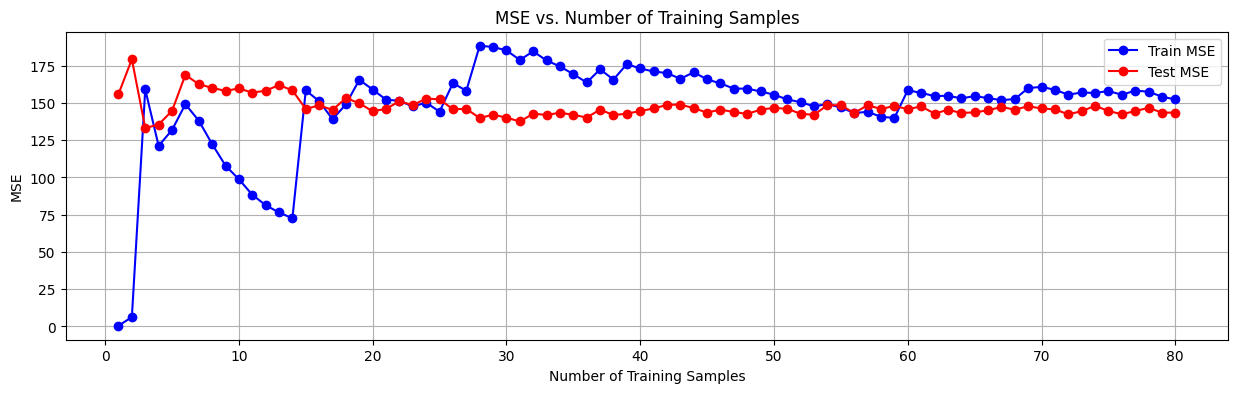

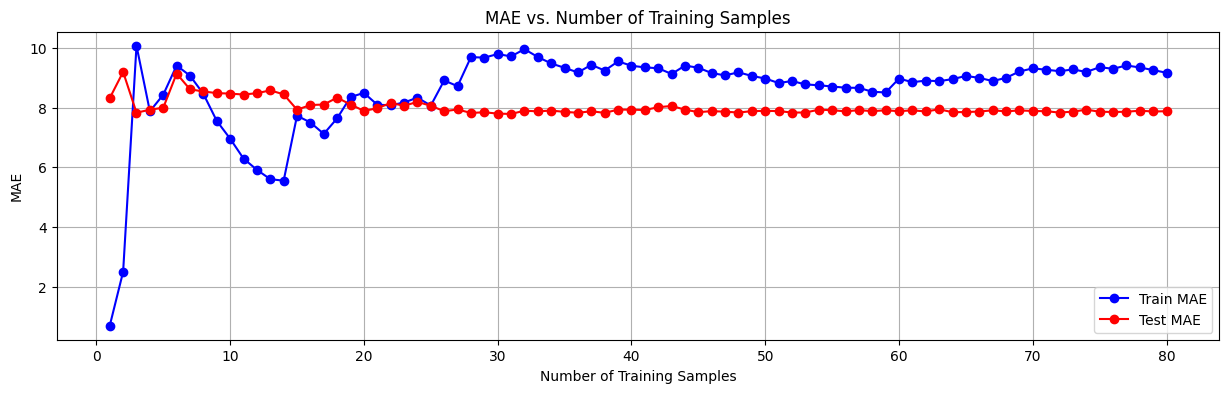

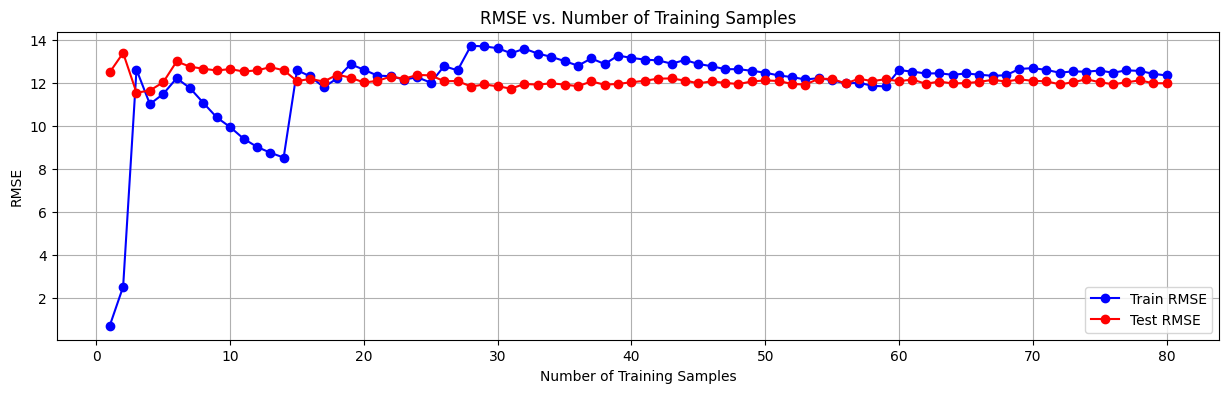

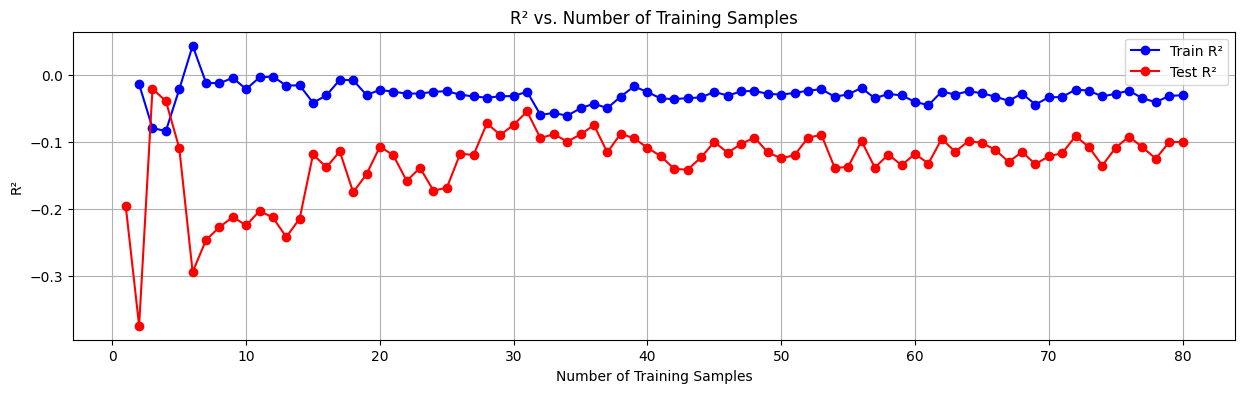

In [10]:
train_mse, test_mse = [], []
train_mae, test_mae = [], []
train_rmse, test_rmse = [], []
train_r2, test_r2 = [], []

# Loop to train the model with increasing amounts of training data
for i in range(1, len(X_train) + 1):
    # Use the first `i` training samples
    X_train_subset = X_train[:i]
    y_train_subset = y_train[:i]

    w = np.random.rand() * 2 - 0.5
    b = np.random.rand() * 2 - 0.5

    LEARNING_RATE = 0.01
    epochs = 100  #
    for _ in range(epochs):
        y_hat_train = w * X_train_subset + b
        error_train = y_train_subset - y_hat_train
        w += LEARNING_RATE * np.sum(error_train * X_train_subset) / len(X_train_subset)
        b += LEARNING_RATE * np.sum(error_train) / len(X_train_subset)

    y_hat_train_full = w * X_train_subset + b
    mse_train = np.mean((y_train_subset - y_hat_train_full) ** 2)
    mae_train = np.mean(np.abs(y_train_subset - y_hat_train_full))
    rmse_train = np.sqrt(mse_train)
    ss_total_train = np.sum((y_train_subset - np.mean(y_train_subset)) ** 2)
    r2_train = 1 - np.sum((y_train_subset - y_hat_train_full) ** 2) / ss_total_train

    train_mse.append(mse_train)
    train_mae.append(mae_train)
    train_rmse.append(rmse_train)
    train_r2.append(r2_train)

    y_hat_test = w * X_test + b
    mse_test = np.mean((y_test - y_hat_test) ** 2)
    mae_test = np.mean(np.abs(y_test - y_hat_test))
    rmse_test = np.sqrt(mse_test)
    ss_total_test = np.sum((y_test - np.mean(y_test)) ** 2)
    r2_test = 1 - np.sum((y_test - y_hat_test) ** 2) / ss_total_test

    test_mse.append(mse_test)
    test_mae.append(mae_test)
    test_rmse.append(rmse_test)
    test_r2.append(r2_test)



# Plot MSE for Train and Test
plt.figure(figsize=(15, 4))

plt.plot(range(1, len(train_mse) + 1), train_mse, label="Train MSE", marker='o', color='blue')
plt.plot(range(1, len(test_mse) + 1), test_mse, label="Test MSE", marker='o', color='red')
plt.title("MSE vs. Number of Training Samples")
plt.xlabel("Number of Training Samples")
plt.ylabel("MSE")
plt.legend()
plt.grid()
plt.show()

# Plot MAE for Train and Test
plt.figure(figsize=(15, 4))
plt.plot(range(1, len(train_mae) + 1), train_mae, label="Train MAE", marker='o', color='blue')
plt.plot(range(1, len(test_mae) + 1), test_mae, label="Test MAE", marker='o', color='red')
plt.title("MAE vs. Number of Training Samples")
plt.xlabel("Number of Training Samples")
plt.ylabel("MAE")
plt.legend()
plt.grid()
plt.show()

# Plot RMSE for Train and Test
plt.figure(figsize=(15, 4))
plt.plot(range(1, len(train_rmse) + 1), train_rmse, label="Train RMSE", marker='o', color='blue')
plt.plot(range(1, len(test_rmse) + 1), test_rmse, label="Test RMSE", marker='o', color='red')
plt.title("RMSE vs. Number of Training Samples")
plt.xlabel("Number of Training Samples")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()

# Plot R2 for Train and Test
plt.figure(figsize=(15, 4))

plt.plot(range(1, len(train_r2) + 1), train_r2, label="Train R²", marker='o', color='blue')
plt.plot(range(1, len(test_r2) + 1), test_r2, label="Test R²", marker='o', color='red')
plt.title("R² vs. Number of Training Samples")
plt.xlabel("Number of Training Samples")
plt.ylabel("R²")
plt.legend()
plt.grid()
plt.show()


In [11]:
print(f"Final Slope (w): {w}")
print(f"Final Intercept (b): {b}\n")
print("\nFinal Errors:")
print(f"Train MSE: {train_mse[-1]:.4f}")
print(f"Test MSE: {test_mse[-1]:.4f}")
print(f"\nTrain RMSE: {train_rmse[-1]:.4f}")
print(f"Test RMSE: {test_rmse[-1]:.4f}")
print(f"\nTrain MAE: {train_mae[-1]:.4f}")
print(f"Test MAE: {test_mae[-1]:.4f}")
print("\nFinal R² Scores:")
print(f"Train R²: {train_r2[-1]:.4f}")
print(f"Test R²: {test_r2[-1]:.4f}")

Final Slope (w): 0.6122102711266116
Final Intercept (b): 3.8694871003518876


Final Errors:
Train MSE: 152.3388
Test MSE: 143.4796

Train RMSE: 12.3426
Test RMSE: 11.9783

Train MAE: 9.1634
Test MAE: 7.8753

Final R² Scores:
Train R²: -0.0297
Test R²: -0.0995


# Nonlinear

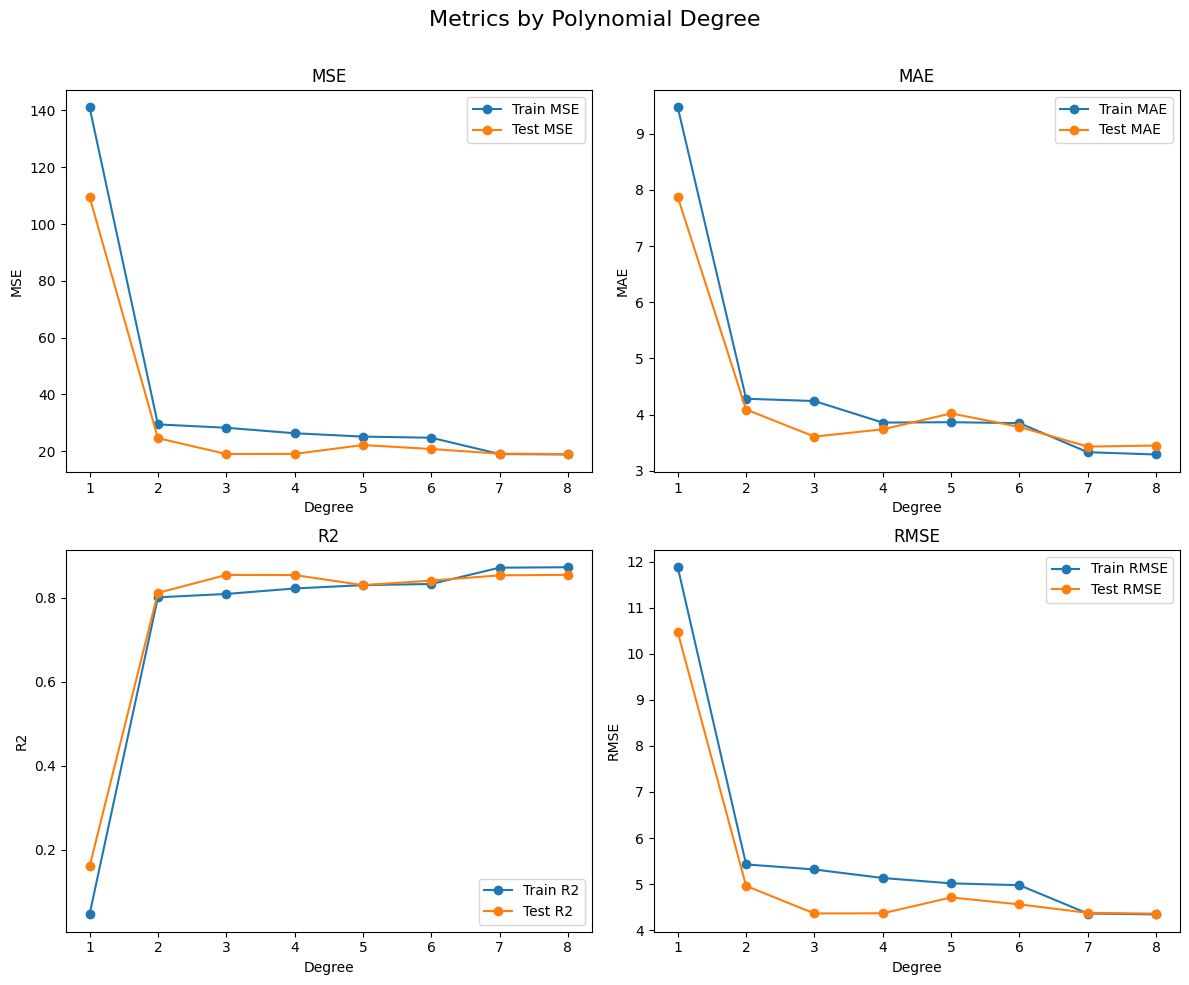

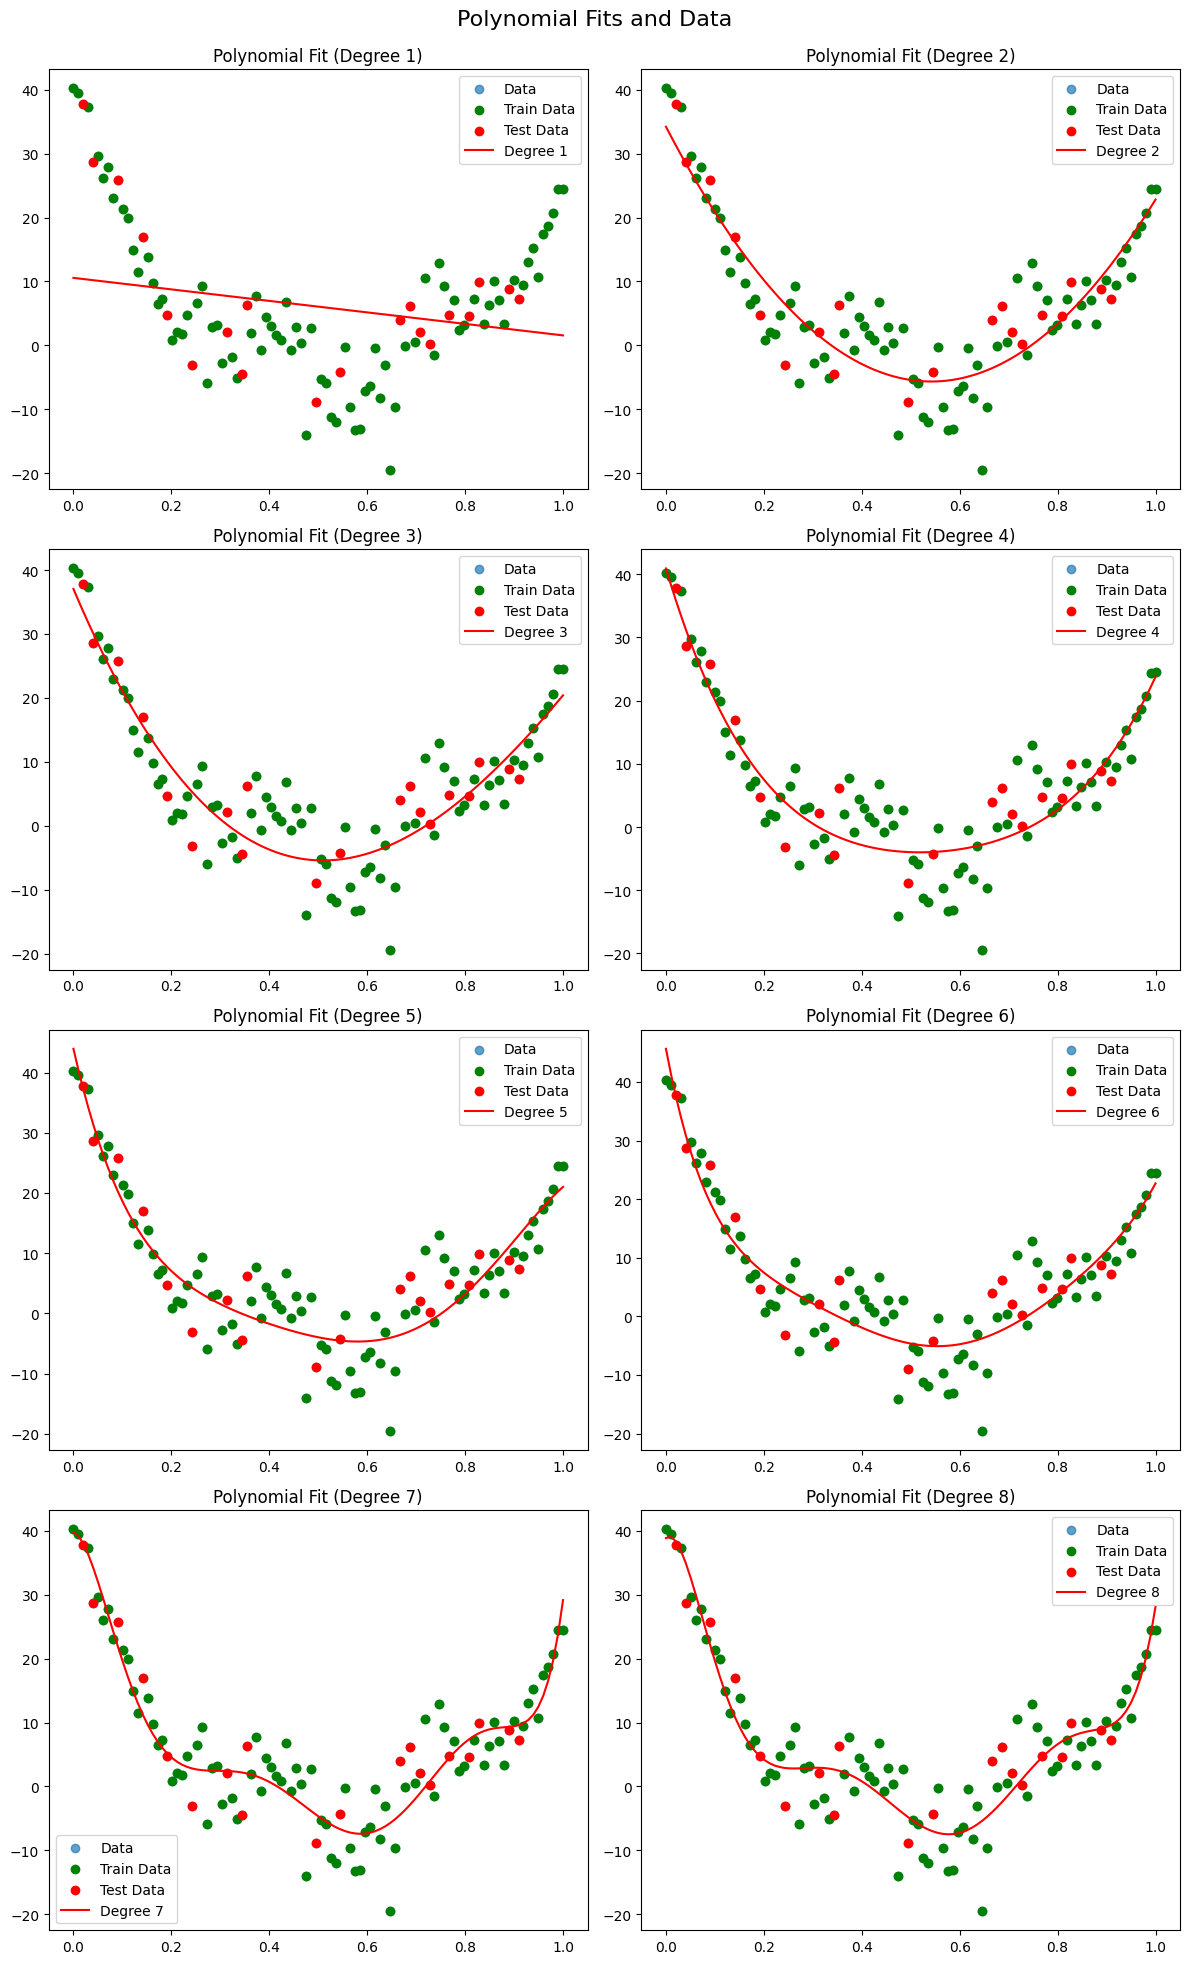

In [22]:
train_errors = []
test_errors = []
coefficients = []

for degree in range(1, 9):
    X_train_poly = np.vander(X_train, degree + 1, increasing=True)
    X_test_poly = np.vander(X_test, degree + 1, increasing=True)

    theta = np.linalg.inv(X_train_poly.T @ X_train_poly) @ X_train_poly.T @ y_train

    y_train_pred = X_train_poly @ theta
    y_test_pred = X_test_poly @ theta

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_mse)
    test_errors.append(test_mse)
    coefficients.append(theta)

# Initialize lists for additional metrics
mae_train = []
mae_test = []
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

for degree in range(1, 9):
    X_train_poly = np.vander(X_train, degree + 1, increasing=True)
    X_test_poly = np.vander(X_test, degree + 1, increasing=True)

    theta = coefficients[degree - 1]

    y_train_pred = X_train_poly @ theta
    y_test_pred = X_test_poly @ theta

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    mae_train.append(train_mae)
    mae_test.append(test_mae)
    r2_train.append(train_r2)
    r2_test.append(test_r2)
    rmse_train.append(train_rmse)
    rmse_test.append(test_rmse)

# Plotting the metrics
degrees = range(1, 9)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Metrics by Polynomial Degree", fontsize=16)

# MSE
axes[0, 0].plot(degrees, train_errors, label="Train MSE", marker='o')
axes[0, 0].plot(degrees, test_errors, label="Test MSE", marker='o')
axes[0, 0].set_title("MSE")
axes[0, 0].set_xlabel("Degree")
axes[0, 0].set_ylabel("MSE")
axes[0, 0].legend()

# MAE
axes[0, 1].plot(degrees, mae_train, label="Train MAE", marker='o')
axes[0, 1].plot(degrees, mae_test, label="Test MAE", marker='o')
axes[0, 1].set_title("MAE")
axes[0, 1].set_xlabel("Degree")
axes[0, 1].set_ylabel("MAE")
axes[0, 1].legend()

# R2
axes[1, 0].plot(degrees, r2_train, label="Train R2", marker='o')
axes[1, 0].plot(degrees, r2_test, label="Test R2", marker='o')
axes[1, 0].set_title("R2")
axes[1, 0].set_xlabel("Degree")
axes[1, 0].set_ylabel("R2")
axes[1, 0].legend()

# RMSE
axes[1, 1].plot(degrees, rmse_train, label="Train RMSE", marker='o')
axes[1, 1].plot(degrees, rmse_test, label="Test RMSE", marker='o')
axes[1, 1].set_title("RMSE")
axes[1, 1].set_xlabel("Degree")
axes[1, 1].set_ylabel("RMSE")
axes[1, 1].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

fig, ax = plt.subplots(4, 2, figsize=(12, 20))
fig.suptitle("Polynomial Fits and Data", fontsize=16)

for degree in range(1, 9):
    X_poly = np.vander(X, degree + 1, increasing=True)
    theta = coefficients[degree - 1]
    y_fit = X_poly @ theta

    row, col = divmod(degree - 1, 2)
    ax[row, col].scatter(X, y, label="Data", alpha=0.7)
    ax[row, col].scatter(X_train, y_train, color='green', label='Train Data')
    ax[row, col].scatter(X_test, y_test, color='red', label='Test Data')
    ax[row, col].plot(X, y_fit, label=f"Degree {degree}", color="red")
    ax[row, col].set_title(f"Polynomial Fit (Degree {degree})")
    ax[row, col].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


In [21]:

metrics_summary = pd.DataFrame({
    "Degree": range(1, 9),
    "Train MSE": train_errors,
    "Test MSE": test_errors,
    "Train MAE": mae_train,
    "Test MAE": mae_test,
    "Train R2": r2_train,
    "Test R2": r2_test,
    "Train RMSE": rmse_train,
    "Test RMSE": rmse_test
})
metrics_summary

,Degree,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2,Train RMSE,Test RMSE
0,1,141.090723,109.564462,9.468924,7.872281,0.046338,0.160418,11.878162,10.467304
1,2,29.447861,24.603269,4.281312,4.089658,0.800956,0.811467,5.426588,4.960168
2,3,28.265974,19.024115,4.239929,3.607097,0.808944,0.854220,5.316575,4.361664
3,4,26.336162,19.056088,3.856924,3.736937,0.821988,0.853975,5.131877,4.365328
4,5,25.154638,22.178963,3.863441,4.019999,0.829974,0.830045,5.015440,4.709455
5,6,24.757821,20.784772,3.846692,3.779226,0.832657,0.840728,4.975723,4.559032
6,7,19.015115,19.145629,3.329026,3.429129,0.871473,0.853289,4.360632,4.375572
7,8,18.855123,18.994026,3.288824,3.448400,0.872554,0.854451,4.342249,4.358214


## DecisionTreeRegressor

Fitting 5 folds for each of 135 candidates, totalling 675 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


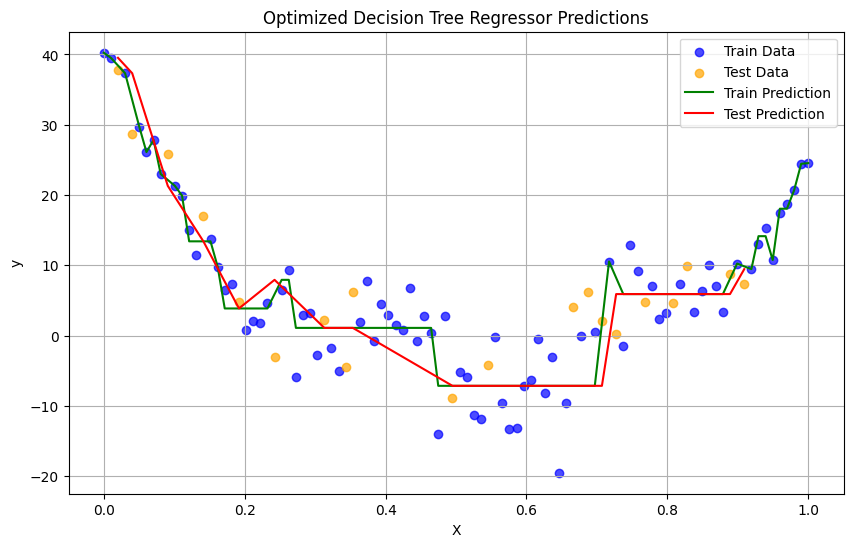

({'max_depth': 5,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 {'Train MSE': 13.621571047569427,
  'Test MSE': 37.737200494815646,
  'Train MAE': 2.540192215481521,
  'Test MAE': 4.879573629868961,
  'Train R2': 0.9079288954543213,
  'Test R2': 0.7108233651400788})

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


# Initialize the model
tree = DecisionTreeRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'max_depth': [2, 3, 5, 7, 10],  # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in a leaf
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider
}

grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train.reshape(-1, 1), y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train.reshape(-1, 1))
y_test_pred = best_model.predict(X_test.reshape(-1, 1))

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Display metrics and best parameters
metrics = {
    "Train MSE": mse_train,
    "Test MSE": mse_test,
    "Train MAE": mae_train,
    "Test MAE": mae_test,
    "Train R2": r2_train,
    "Test R2": r2_test,
}

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label="Train Data", color="blue", alpha=0.7)
plt.scatter(X_test, y_test, label="Test Data", color="orange", alpha=0.7)
plt.plot(np.sort(X_train), y_train_pred[np.argsort(X_train)], label="Train Prediction", color="green")
plt.plot(np.sort(X_test), y_test_pred[np.argsort(X_test)], label="Test Prediction", color="red")
plt.title("Optimized Decision Tree Regressor Predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

best_params, metrics


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters:
  max_depth: 5
  max_features: None
  min_samples_leaf: 1
  min_samples_split: 2

Metrics:
  Train MSE: 13.6216
  Test MSE: 37.7372
  Train MAE: 2.5402
  Test MAE: 4.8796
  Train RMSE: 3.6907
  Test RMSE: 6.1431
  Train R2: 0.9079
  Test R2: 0.7108


<Figure size 1500x1000 with 0 Axes>

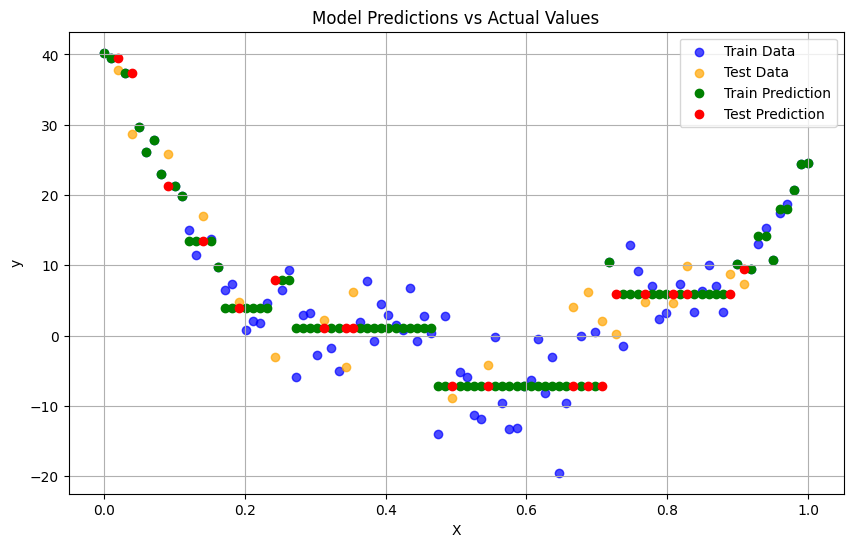

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


# Initialize the model
tree = DecisionTreeRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'max_depth': [2, 3, 5, 7],  # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in a leaf
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider
}

grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train.reshape(-1, 1), y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions
y_train_pred = best_model.predict(X_train.reshape(-1, 1))
y_test_pred = best_model.predict(X_test.reshape(-1, 1))

# Compute metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Best Parameters:")
for param, value in best_params.items():
    print(f"  {param}: {value}")

print("\nMetrics:")
print(f"  Train MSE: {mse_train:.4f}")
print(f"  Test MSE: {mse_test:.4f}")
print(f"  Train MAE: {mae_train:.4f}")
print(f"  Test MAE: {mae_test:.4f}")
print(f"  Train RMSE: {rmse_train:.4f}")
print(f"  Test RMSE: {rmse_test:.4f}")
print(f"  Train R2: {r2_train:.4f}")
print(f"  Test R2: {r2_test:.4f}")
# Plot error metrics
plt.figure(figsize=(15, 10))



# Plot model predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label="Train Data", color="blue", alpha=0.7)
plt.scatter(X_test, y_test, label="Test Data", color="orange", alpha=0.7)
plt.scatter(np.sort(X_train), y_train_pred[np.argsort(X_train)], label="Train Prediction", color="green")
plt.scatter(np.sort(X_test), y_test_pred[np.argsort(X_test)], label="Test Prediction", color="red")
plt.title("Model Predictions vs Actual Values")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


## Polynomial PolynomialFeatures





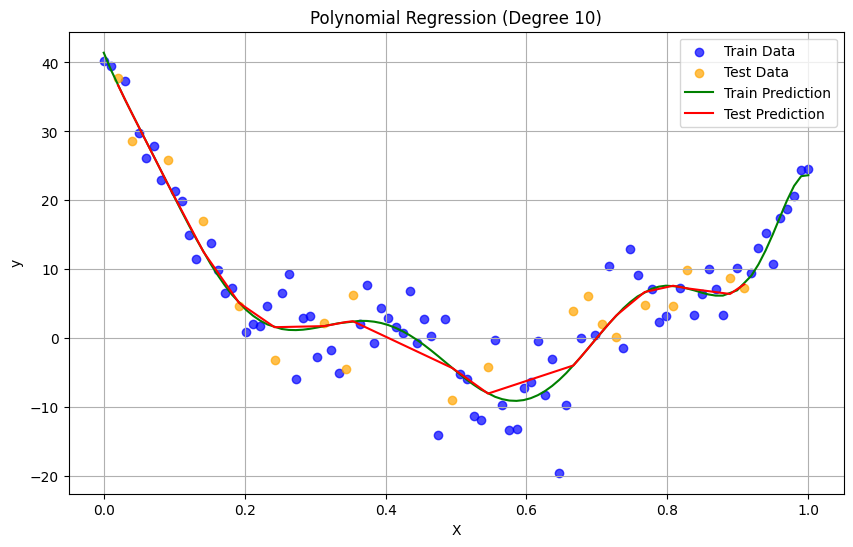

{'Train MSE': 16.411226453247608,
 'Test MSE': 16.22508017580954,
 'Train MAE': 3.014308935101017,
 'Test MAE': 3.380208599519581,
 'Train R2': 0.8890730194613355,
 'Test R2': 0.8756687294221096}

In [68]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


degree = 10

# Create a pipeline with PolynomialFeatures and LinearRegression
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model to the training data
poly_model.fit(X_train.reshape(-1, 1), y_train)

y_train_pred = poly_model.predict(X_train.reshape(-1, 1))
y_test_pred = poly_model.predict(X_test.reshape(-1, 1))

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

metrics = {
    "Train MSE": mse_train,
    "Test MSE": mse_test,
    "Train MAE": mae_train,
    "Test MAE": mae_test,
    "Train R2": r2_train,
    "Test R2": r2_test,
}

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label="Train Data", color="blue", alpha=0.7)
plt.scatter(X_test, y_test, label="Test Data", color="orange", alpha=0.7)
plt.plot(np.sort(X_train), y_train_pred[np.argsort(X_train)], label="Train Prediction", color="green")
plt.plot(np.sort(X_test), y_test_pred[np.argsort(X_test)], label="Test Prediction", color="red")
plt.title(f"Polynomial Regression (Degree {degree})")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

metrics


In [72]:
terms = [f"{coeff:.4f}*x^{i}" for i, coeff in enumerate(coefficients) if abs(coeff) > 1e-3]
polynomial_equation = " + ".join(terms)
polynomial_equation = f"y = {intercept:.4f} + " + polynomial_equation[7:]

print("Simplified Polynomial Equation:")
print(polynomial_equation)


Simplified Polynomial Equation:
y = 41.4165 + 55*x^1 + 1442.1383*x^2 + -17202.8541*x^3 + 91869.3870*x^4 + -163501.6392*x^5 + -165686.9259*x^6 + 1055026.5375*x^7 + -1593621.1166*x^8 + 1062281.0887*x^9 + -270368.4414*x^10


## XGBoost Regression

In [23]:
pip install xgboost


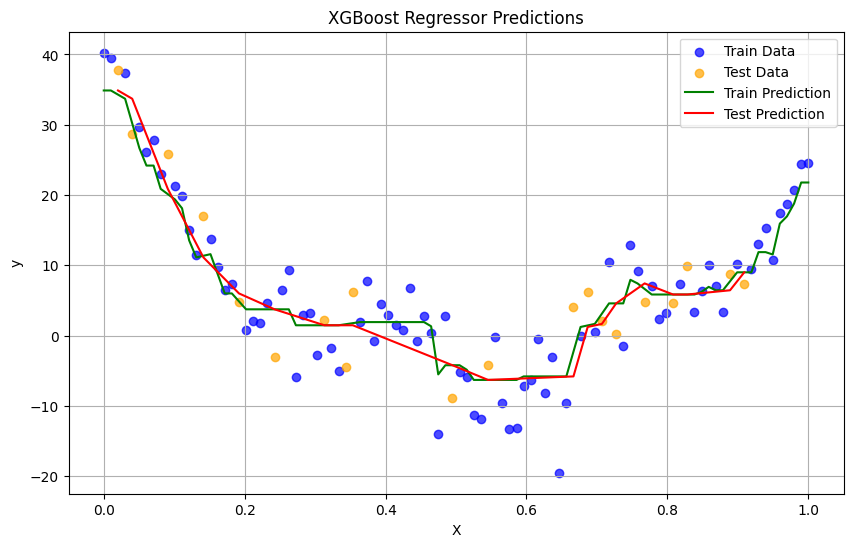

{'Train MSE': 14.241995636410383,
 'Test MSE': 19.92941180971756,
 'Train MAE': 2.9598514300070455,
 'Test MAE': 3.8237131046310595,
 'Train R2': 0.9037353133056544,
 'Test R2': 0.8472827828692953,
 'subsample': 1,
 'colsample_bytree': 1}

In [86]:

xgb_model = XGBRegressor(

    n_estimators=20,  # Number of trees
    learning_rate=0.1,  # Step size shrinkage
    max_depth=4,  # Maximum depth of a tree
    reg_alpha=0.1,  # L1 Regularization
    reg_lambda=0.1,  # L2 Regularization
    random_state=73  # For reproducibility
)

xgb_model.fit(X_train.reshape(-1, 1), y_train)
y_train_pred = xgb_model.predict(X_train.reshape(-1, 1))
y_test_pred = xgb_model.predict(X_test.reshape(-1, 1))


mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

metrics = {
    "Train MSE": mse_train,
    "Test MSE": mse_test,
    "Train MAE": mae_train,
    "Test MAE": mae_test,
    "Train R2": r2_train,
    "Test R2": r2_test,
    "subsample": 1,
    "colsample_bytree": 1
}

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label="Train Data", color="blue", alpha=0.7)
plt.scatter(X_test, y_test, label="Test Data", color="orange", alpha=0.7)
plt.plot(np.sort(X_train), y_train_pred[np.argsort(X_train)], label="Train Prediction", color="green")
plt.plot(np.sort(X_test), y_test_pred[np.argsort(X_test)], label="Test Prediction", color="red")
plt.title("XGBoost Regressor Predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

metrics


## Reguralization

In [68]:
def soft_thresholding_operator(coef, lambda_):
    return np.sign(coef) * np.maximum(np.abs(coef) - lambda_, 0)

def train_l1_regularized_polynomial(X, y, degree, alpha, learning_rate=0.01, max_iter=1000, tol=1e-6):
    """
    Train a polynomial regression model with L1 regularization and a bias term.
    """
    X_poly = np.vander(X, degree + 1, increasing=True)
    m, n = X_poly.shape

    theta = np.zeros(n)

    for iteration in range(max_iter):
        y_pred = X_poly @ theta

        gradients = (-2 / m) * X_poly.T @ (y - y_pred)

        theta_new = soft_thresholding_operator(theta - learning_rate * gradients, alpha * learning_rate)

        if np.linalg.norm(theta - theta_new, ord=1) < tol:
            break

        theta = theta_new

    return theta

degree = 3 # Degree of polynomial
alpha = 0.01  # Regularization strength (L1 penalty)
learning_rate = 0.1  # Learning rate for gradient descent
max_iter = 1000  # Maximum number of iterations
tol = 1e-6  # Convergence tolerance

theta = train_l1_regularized_polynomial(X_train, y_train, degree, alpha, learning_rate, max_iter, tol)
X_train_poly = np.vander(X_train, degree + 1, increasing=True)
X_test_poly = np.vander(X_test, degree + 1, increasing=True)
y_train_pred = X_train_poly @ theta
y_test_pred = X_test_poly @ theta

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print("Trained Coefficients (for x^0, x, x^2, x^3):", theta)
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")
print(f"Train R2: {train_r2}")
print(f"Test R2: {test_r2}")


Trained Coefficients (for x^0, x, x^2, x^3): [ 23.61224468 -72.08319839  11.78134223  57.2420104 ]
Train MSE: 41.93965405437498
Test MSE: 41.399669141162484
Train MAE: 4.952844809489596
Test MAE: 5.269526626837759
Train R2: 0.7165209314281723
Test R2: 0.6827582107422042
